In [2]:
#Fitting a high-order polynomial curve to the tuner profile to empirically find the max and min values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

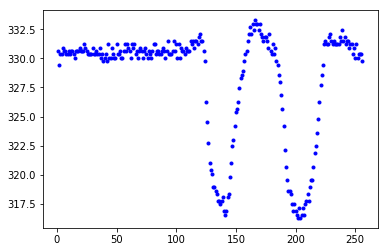

In [3]:
#Parse and plot
sample_xf = pd.ExcelFile('sample_profiles.xlsx')
sample_pf = sample_xf.parse('hand')
plt.plot(sample_pf['Index'],sample_pf['Distance'],'b.')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


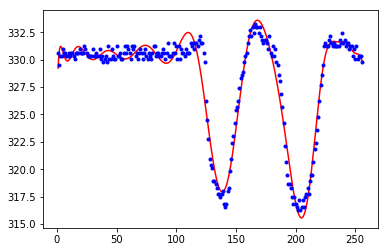

In [4]:
#import numpy.polynomial.polynomial as poly
x_new = np.linspace(sample_pf['Index'][0], sample_pf['Index'][255], num=len(sample_pf['Index'])*10)
coefs = np.polyfit(sample_pf['Index'], sample_pf['Distance'], deg=30)
ffit = np.polyval(coefs, x_new)
plt.plot(x_new, ffit, 'r-')
plt.plot(sample_pf['Index'],sample_pf['Distance'],'b.')

In [29]:
#Get and sort the local maxima of the fit
loc_max = ffit[argrelextrema(ffit, np.greater)[0]]
loc_max.sort()
#Get and sort the local minima of the fit
loc_min = ffit[argrelextrema(ffit, np.less)[0]]
loc_min.sort()

local_zero = 0.03937008*330.2 #an estimate from the plot, in practice will be determined by our calibration.
#Identify the tuner bottom as the position of the largest maximum
tuner_bottom = 0.03937008*loc_max[-1]+0.012645833 # addint the tuner bottom thickness to the largest maximum
#Identify the tuner top as the average of the positions of the two largest minima, either side of the tuner well
tuner_top = np.average(loc_min[0:2])*0.03937008
tuner_size = (tuner_bottom - tuner_top)
tuner_depth = tuner_bottom - local_zero

print('the tuner size is '+str(tuner_size)+' inches')
print('the tuner depth is '+str(tuner_depth)+' inches')

the tuner size is 0.6759536724897384 inches
the tuner depth is 0.14621790001423562 inches
